# Dissertation

Module number: BNM832

Student Name: Chayut Sangsuwan
    
Student number: 220265483

# 6. Exploratory Data Analysis

Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions (IBM)

In [349]:
from datetime import datetime
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import io
from nbformat import read, NO_CONVERT
import warnings
warnings.filterwarnings("ignore")

In [350]:
sns.color_palette("Set2")

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [351]:
# Load the data
df = pd.read_csv('Process_data.csv')

In [352]:
# Inspect Data
df.head()

,category,close_date,currency,funds_raised_amount,funds_raised_percent,is_indemand,is_pre_launch,open_date,perk_goal_percentage,perks_claimed,...,"Podcasts, Blogs & Vlogs",Productivity,Spirituality,Tabletop Games,Transportation,Travel & Outdoors,Video Games,Web Series & TV Shows,Wellness,Writing & Publishing
0,Film,2020-02-02 07:59:59+00:00,USD,405,0.202500,False,False,2020-01-02 08:00:00+00:00,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,Food & Beverages,2012-10-29 06:59:59+00:00,USD,625,0.010870,False,False,2012-08-29 19:58:06+00:00,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,Local Businesses,2015-02-08 07:59:59+00:00,USD,1790,0.795556,False,False,2014-12-19 12:13:16+00:00,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,Film,2019-02-09 07:59:59+00:00,USD,5425,1.085000,False,False,2018-12-10 08:00:00+00:00,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,Health & Fitness,2012-12-28 07:59:59+00:00,USD,70,0.007000,False,False,2012-11-28 15:02:30+00:00,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [353]:
# Inspect Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65487 entries, 0 to 65486
Data columns (total 88 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   category                    65487 non-null  object 
 1   close_date                  65487 non-null  object 
 2   currency                    65487 non-null  object 
 3   funds_raised_amount         65487 non-null  int64  
 4   funds_raised_percent        65487 non-null  float64
 5   is_indemand                 65487 non-null  bool   
 6   is_pre_launch               65487 non-null  bool   
 7   open_date                   65487 non-null  object 
 8   perk_goal_percentage        65487 non-null  float64
 9   perks_claimed               65487 non-null  float64
 10  product_stage               65487 non-null  object 
 11  project_id                  65487 non-null  int64  
 12  project_type                65487 non-null  object 
 13  tagline                     654

In [354]:
'''# Count the number of projects in each year
project_counts = filtered_df['open_year'].value_counts().sort_index()

# Create a bar chart
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

ax = sns.barplot(x=project_counts.index, y=project_counts.values, color='blue')

plt.xlabel("Year")
plt.ylabel("Number of Projects")
plt.title("Number of Projects by Year (2020-2022)")

# Annotate the bars with the actual counts
for index, value in enumerate(project_counts):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

plt.show()'''

'# Count the number of projects in each year\nproject_counts = filtered_df[\'open_year\'].value_counts().sort_index()\n\n# Create a bar chart\nsns.set(style="whitegrid")\nplt.figure(figsize=(8, 6))\n\nax = sns.barplot(x=project_counts.index, y=project_counts.values, color=\'blue\')\n\nplt.xlabel("Year")\nplt.ylabel("Number of Projects")\nplt.title("Number of Projects by Year (2020-2022)")\n\n# Annotate the bars with the actual counts\nfor index, value in enumerate(project_counts):\n    plt.text(index, value + 0.5, str(value), ha=\'center\', va=\'bottom\', fontsize=10)\n\nplt.show()'

## 6.1 Distribution of success rate

In [355]:
pivot_df = df.pivot_table(index=df['open_year'], columns= df['status'], aggfunc='size', fill_value=0)
pivot_df

status,Fail,Success
open_year,,
2010,47,6
2011,267,74
2012,1196,243
2013,1849,533
2014,2417,655
2015,6419,700
2016,3517,806
2017,3879,1289
2018,3368,1598


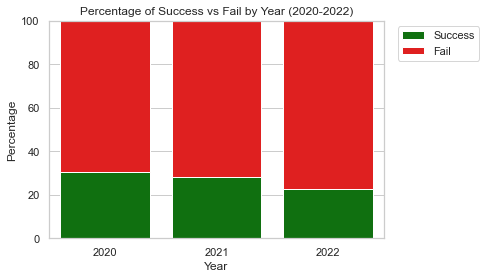

In [356]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for years 2020-2022
filtered_df = df[df['open_year'].between(2020, 2022)]

# Create a pivot table and calculate the percentage of each category (Success and Fail) for each year
pivot_df = filtered_df.pivot_table(index=df['open_year'], columns=df['status'], aggfunc='size', fill_value=0)
pivot_df_percentage = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Plot the 100% stacked bar chart using Seaborn
sns.set(style="whitegrid")  # Optional: Set a style for the plot
plt.figure(figsize=(6, 4))  # Adjusting the figure size to fit within limits

ax = sns.barplot(x=pivot_df_percentage.index, y='Success', data=pivot_df_percentage, color='green', label='Success')
ax = sns.barplot(x=pivot_df_percentage.index, y='Fail', data=pivot_df_percentage, color='red', bottom=pivot_df_percentage['Success'], label='Fail')

plt.xlabel("Year")
plt.ylabel("Percentage")
plt.title("Percentage of Success vs Fail by Year (2020-2022)")


plt.ylim(0, 100)  # Set the y-axis limit to 0-100 for the percentage representation

# Move the legend outside the graph to the upper right corner
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1))

plt.show()

In [357]:
df.groupby(['category', 'status']).size().unstack(fill_value=0)

status,Fail,Success
category,,
Animal Rights,833,64
Art,1946,562
Audio,552,585
Camera Gear,409,323
Comics,1560,1412
Culture,989,171
Dance & Theater,2056,438
Education,1185,98
Energy & Green Tech,915,265


## 6.2 Percentage Distribution of Projects in Each Category

### 2020

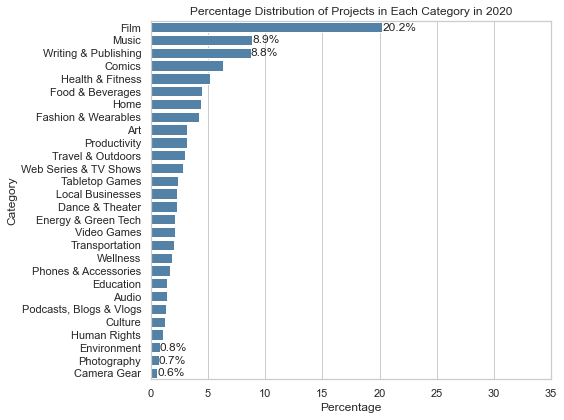

In [358]:
# Filter the DataFrame for year 2020
df_2020 = df[df['open_year'] == 2020]

# Calculate the percentage distribution for the year 2020
percentage_distribution_2020 = df_2020['category'].value_counts(normalize=True) * 100

# Sort the percentage distribution in descending order
percentage_distribution_2020 = percentage_distribution_2020.sort_values(ascending=False)

# Create the bar chart with a single color
plt.figure(figsize=(8, 6))
sns.barplot(x=percentage_distribution_2020.values, y=percentage_distribution_2020.index, color='steelblue')
plt.xlabel("Percentage")
plt.ylabel("Category")
plt.title("Percentage Distribution of Projects in Each Category in 2020")
plt.xlim(0, 35)

# Add labels to the bars for top 3 and bottom 3
for index, (category, value) in enumerate(percentage_distribution_2020.iteritems()):
    if index < 3 or index >= len(percentage_distribution_2020) - 3:
        plt.text(value, index, f'{value:.1f}%', va='center')

plt.tight_layout()
plt.show()

### 2021

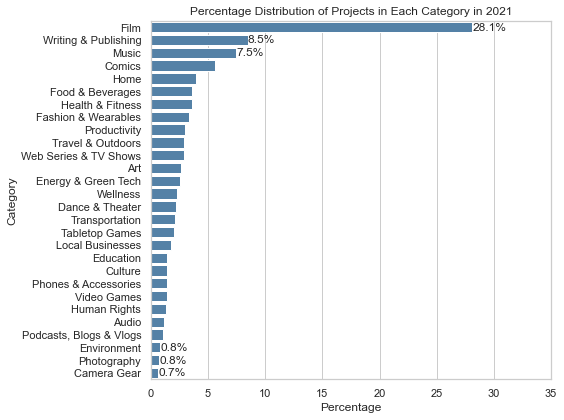

In [359]:
# Filter the DataFrame for year 2021
df_2021 = df[df['open_year'] == 2021]

# Calculate the percentage distribution for the year 2020
percentage_distribution_2021 = df_2021['category'].value_counts(normalize=True) * 100

# Sort the percentage distribution in descending order
percentage_distribution_2021 = percentage_distribution_2021.sort_values(ascending=False)

# Create the bar chart with a single color
plt.figure(figsize=(8, 6))
sns.barplot(x=percentage_distribution_2021.values, y=percentage_distribution_2021.index, color='steelblue')
plt.xlabel("Percentage")
plt.ylabel("Category")
plt.title("Percentage Distribution of Projects in Each Category in 2021")
plt.xlim(0, 35)

# Add labels to the bars for top 3 and bottom 3
for index, (category, value) in enumerate(percentage_distribution_2021.iteritems()):
    if index < 3 or index >= len(percentage_distribution_2021) - 3:
        plt.text(value, index, f'{value:.1f}%', va='center')

plt.tight_layout()
plt.show()

### 2022

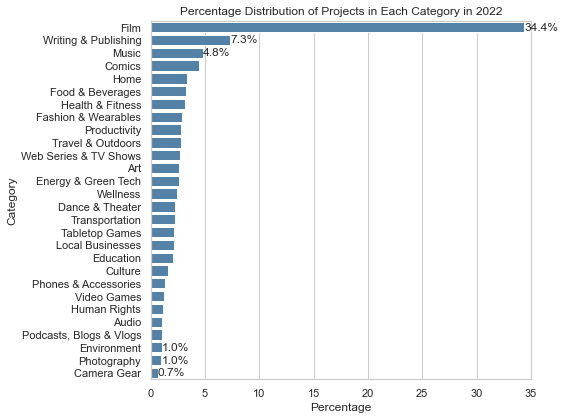

In [360]:
# Filter the DataFrame for year 2022
df_2022 = df[df['open_year'] == 2022]

# Calculate the percentage distribution for the year 2022
percentage_distribution_2022 = df_2022['category'].value_counts(normalize=True) * 100

# Sort the percentage distribution in descending order
percentage_distribution_2022 = percentage_distribution_2022.sort_values(ascending=False)

# Create the bar chart with a single color
plt.figure(figsize=(8, 6))
sns.barplot(x=percentage_distribution_2022.values, y=percentage_distribution_2021.index, color='steelblue')
plt.xlabel("Percentage")
plt.ylabel("Category")
plt.title("Percentage Distribution of Projects in Each Category in 2022")
plt.xlim(0, 35)

# Add labels to the bars for top 3 and bottom 3
for index, (category, value) in enumerate(percentage_distribution_2022.iteritems()):
    if index < 3 or index >= len(percentage_distribution_2022) - 3:
        plt.text(value, index, f'{value:.1f}%', va='center')

plt.tight_layout()
plt.show()

## 6.3 Percentage Distribution of Successful Projects in Each Category

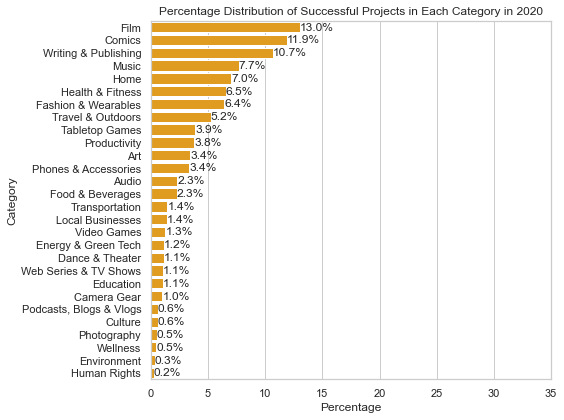

In [361]:
# Filter the DataFrame for year 2020 and status 'success'
df_2020_success = df[(df['open_year'] == 2020) & (df['Status_Boo'] == 1)]

# Calculate the percentage distribution for the year 2020
percentage_distribution_success_2020 = df_2020_success['category'].value_counts(normalize=True) * 100

# Sort the percentage distribution in descending order
percentage_distribution_success_2020 = percentage_distribution_success_2020.sort_values(ascending=False)

# Create the bar chart with a single color
plt.figure(figsize=(8, 6))
sns.barplot(x=percentage_distribution_success_2020.values, y=percentage_distribution_success_2020.index, color='orange')
plt.xlabel("Percentage")
plt.ylabel("Category")
plt.title("Percentage Distribution of Successful Projects in Each Category in 2020")
plt.xlim(0, 35)

# Add labels to the bars
for index, value in enumerate(percentage_distribution_success_2020):
    plt.text(value, index, f'{value:.1f}%', ha='left', va='center')

plt.tight_layout()
plt.show()

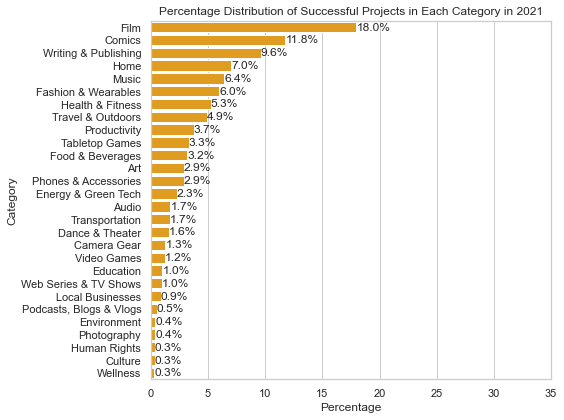

In [362]:
# Filter the DataFrame for year 2021 and status 'success'
df_2021_success = df[(df['open_year'] == 2021) & (df['Status_Boo'] == 1)]

# Calculate the percentage distribution for the year 2021
percentage_distribution_success_2021 = df_2021_success['category'].value_counts(normalize=True) * 100

# Sort the percentage distribution in descending order
percentage_distribution_success_2021 = percentage_distribution_success_2021.sort_values(ascending=False)

# Create the bar chart with a single color
plt.figure(figsize=(8, 6))
sns.barplot(x=percentage_distribution_success_2021.values, y=percentage_distribution_success_2021.index, color='orange')
plt.xlabel("Percentage")
plt.ylabel("Category")
plt.title("Percentage Distribution of Successful Projects in Each Category in 2021")
plt.xlim(0, 35)

# Add labels to the bars
for index, value in enumerate(percentage_distribution_success_2021):
    plt.text(value, index, f'{value:.1f}%', ha='left', va='center')

plt.tight_layout()
plt.show()

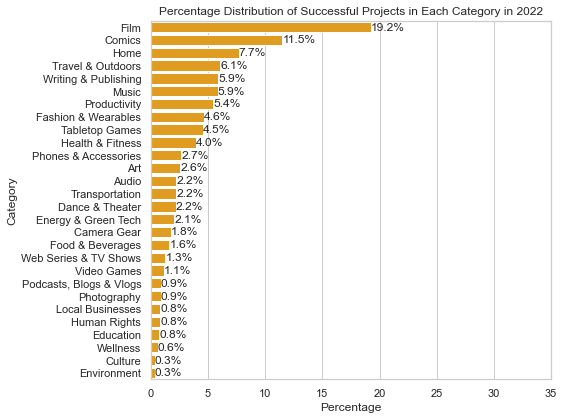

In [363]:
# Filter the DataFrame for year 2022 and status 'success'
df_2022_success = df[(df['open_year'] == 2022) & (df['Status_Boo'] == 1)]

# Calculate the percentage distribution for the year 2021
percentage_distribution_success_2022 = df_2022_success['category'].value_counts(normalize=True) * 100

# Sort the percentage distribution in descending order
percentage_distribution_success_2022 = percentage_distribution_success_2022.sort_values(ascending=False)

# Create the bar chart with a single color
plt.figure(figsize=(8, 6))
sns.barplot(x=percentage_distribution_success_2022.values, y=percentage_distribution_success_2022.index, color='orange')
plt.xlabel("Percentage")
plt.ylabel("Category")
plt.title("Percentage Distribution of Successful Projects in Each Category in 2022")
plt.xlim(0, 35)

# Add labels to the bars
for index, value in enumerate(percentage_distribution_success_2022):
    plt.text(value, index, f'{value:.1f}%', ha='left', va='center')

plt.tight_layout()
plt.show()

## 6.4 Percentage Distribution of success rate in Each Category

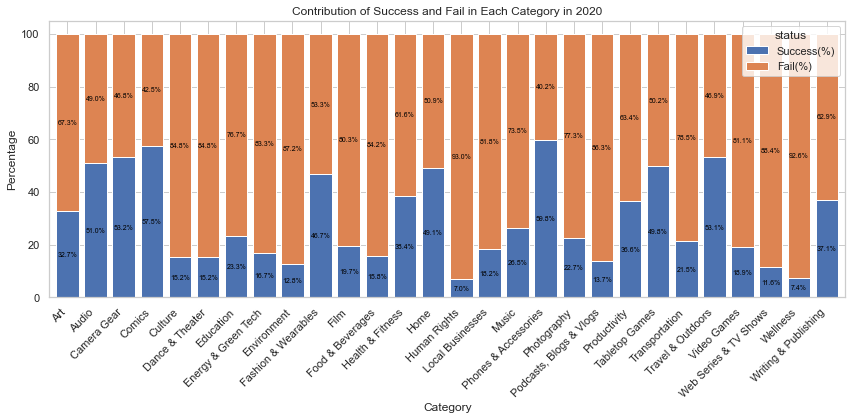

In [364]:
# Filter the DataFrame for rows where 'open_year' is equal to 2020
df_filtered_2020 = df[df['open_year'] == 2020]

# Pivot the filtered data to get the counts of success and fail for each category
pivot_df_filtered_2020 = df_filtered_2020.groupby(['category', 'status']).size().unstack(fill_value=0)

# Calculate the total for each category
pivot_df_filtered_2020['total'] = pivot_df_filtered_2020['Success'] + pivot_df_filtered_2020['Fail']

# Calculate the percentage of success and fail for each category
pivot_df_filtered_2020['Success(%)'] = (pivot_df_filtered_2020['Success'] / pivot_df_filtered_2020['total']) * 100
pivot_df_filtered_2020['Fail(%)'] = (pivot_df_filtered_2020['Fail'] / pivot_df_filtered_2020['total']) * 100

# Plot the 100% stacked bar chart with increased column width
fig, ax = plt.subplots(figsize=(12, 6))
bars = pivot_df_filtered_2020[['Success(%)', 'Fail(%)']].plot(kind='bar', stacked=True, ax=ax, width=0.8)  # Adjust the width as needed

# Set the title and labels
ax.set_title("Contribution of Success and Fail in Each Category in 2020")
ax.set_xlabel("Category")
ax.set_ylabel("Percentage")
ax.set_xticklabels(pivot_df_filtered_2020.index, rotation=45, ha="right")

# Add labels to the bars
for p in bars.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=7, color='black')

plt.tight_layout()
plt.show()

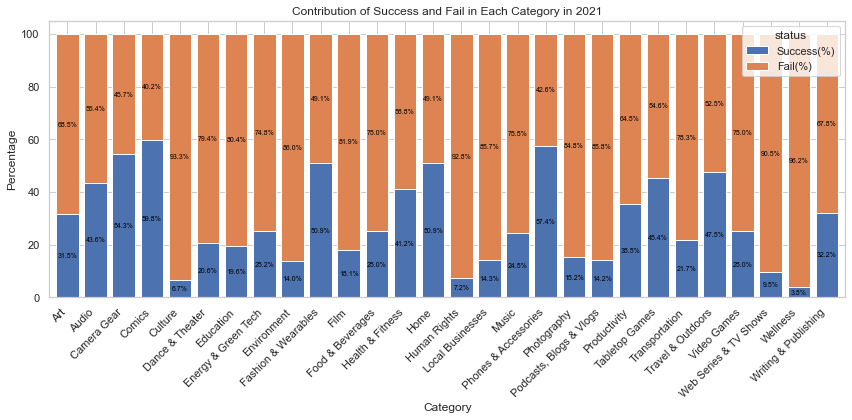

In [365]:
# Filter the DataFrame for rows where 'open_year' is equal to 2020
df_filtered_2021 = df[df['open_year'] == 2021]

# Pivot the filtered data to get the counts of success and fail for each category
pivot_df_filtered_2021 = df_filtered_2021.groupby(['category', 'status']).size().unstack(fill_value=0)

# Calculate the total for each category
pivot_df_filtered_2021['total'] = pivot_df_filtered_2021['Success'] + pivot_df_filtered_2021['Fail']

# Calculate the percentage of success and fail for each category
pivot_df_filtered_2021['Success(%)'] = (pivot_df_filtered_2021['Success'] / pivot_df_filtered_2021['total']) * 100
pivot_df_filtered_2021['Fail(%)'] = (pivot_df_filtered_2021['Fail'] / pivot_df_filtered_2021['total']) * 100

# Plot the 100% stacked bar chart with increased column width
fig, ax = plt.subplots(figsize=(12, 6))
bars = pivot_df_filtered_2021[['Success(%)', 'Fail(%)']].plot(kind='bar', stacked=True, ax=ax, width=0.8)  # Adjust the width as needed

# Set the title and labels
ax.set_title("Contribution of Success and Fail in Each Category in 2021")
ax.set_xlabel("Category")
ax.set_ylabel("Percentage")
ax.set_xticklabels(pivot_df_filtered_2021.index, rotation=45, ha="right")

# Add labels to the bars
for p in bars.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=7, color='black')

plt.tight_layout()
plt.show()

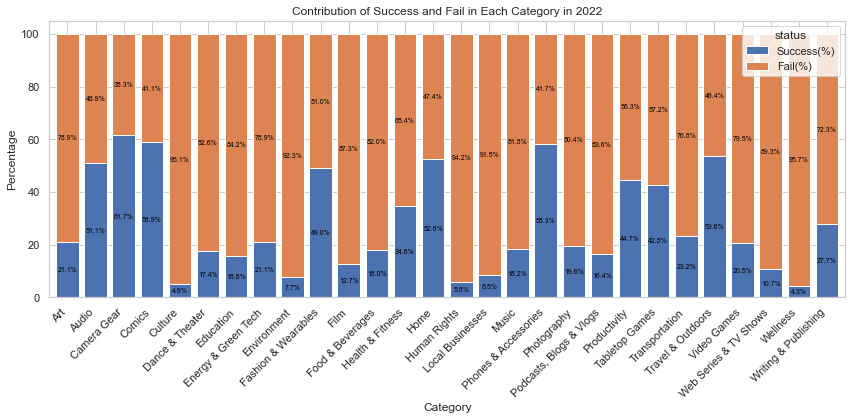

In [366]:
# Filter the DataFrame for rows where 'open_year' is equal to 2022
df_filtered_2022 = df[df['open_year'] == 2022]

# Pivot the filtered data to get the counts of success and fail for each category
pivot_df_filtered_2022 = df_filtered_2022.groupby(['category', 'status']).size().unstack(fill_value=0)

# Calculate the total for each category
pivot_df_filtered_2022['total'] = pivot_df_filtered_2022['Success'] + pivot_df_filtered_2022['Fail']

# Calculate the percentage of success and fail for each category
pivot_df_filtered_2022['Success(%)'] = (pivot_df_filtered_2022['Success'] / pivot_df_filtered_2022['total']) * 100
pivot_df_filtered_2022['Fail(%)'] = (pivot_df_filtered_2022['Fail'] / pivot_df_filtered_2022['total']) * 100

# Plot the 100% stacked bar chart with increased column width
fig, ax = plt.subplots(figsize=(12, 6))
bars = pivot_df_filtered_2022[['Success(%)', 'Fail(%)']].plot(kind='bar', stacked=True, ax=ax, width=0.8)  # Adjust the width as needed

# Set the title and labels
ax.set_title("Contribution of Success and Fail in Each Category in 2022")
ax.set_xlabel("Category")
ax.set_ylabel("Percentage")
ax.set_xticklabels(pivot_df_filtered_2022.index, rotation=45, ha="right")

# Add labels to the bars
for p in bars.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=7, color='black')

plt.tight_layout()
plt.show()

In [367]:
pivot_df

status,Fail,Success
open_year,,
2020,7419,3258
2021,7502,2965
2022,7131,2096


## 6.5 InDemand

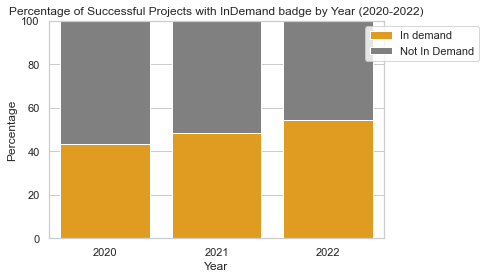

In [368]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for years 2020-2022
filtered_df = df[df['open_year'].between(2020, 2022) & (df['status'] == 'Success')]

# Create a pivot table and calculate the percentage of each category (Success and Fail) for each year
pivot_df = filtered_df.pivot_table(index=df['open_year'], columns=df['is_indemand'], aggfunc='size', fill_value=0)
pivot_df_percentage = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Plot the 100% stacked bar chart using Seaborn
sns.set(style="whitegrid")  # Optional: Set a style for the plot
plt.figure(figsize=(6, 4))  # Adjusting the figure size to fit within limits

ax = sns.barplot(x=pivot_df_percentage.index, y=1, data=pivot_df_percentage, color='orange', label='In demand')
ax = sns.barplot(x=pivot_df_percentage.index, y=0, data=pivot_df_percentage, color='grey', bottom=pivot_df_percentage[1], label='Not In Demand')

plt.xlabel("Year")
plt.ylabel("Percentage")
plt.title("Percentage of Successful Projects with InDemand badge by Year (2020-2022)")


plt.ylim(0, 100)  # Set the y-axis limit to 0-100 for the percentage representation

# Move the legend outside the graph to the upper right corner
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1))

    
plt.show()

In [369]:
pivot_df_percentage

is_indemand,False,True
open_year,,
2020,56.445672,43.554328
2021,51.703204,48.296796
2022,45.706107,54.293893


## 6.6 Proven Project

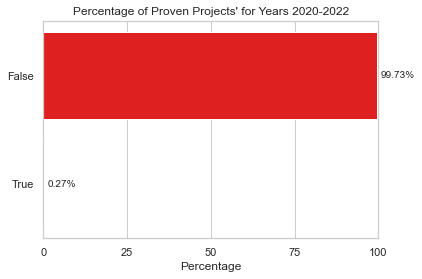

In [370]:
# Filter data for years 2020-2022
filtered_df = df[df['open_year'].between(2020, 2022)]

# Calculate the percentage distribution of 'is_proven' within the years 2020-2022
is_proven_distribution = filtered_df['is_proven'].value_counts(normalize=True) * 100

# Plot the horizontal grouped bar chart with distribution of 'is_proven'
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))

ax = sns.barplot(x=is_proven_distribution.values, y=is_proven_distribution.index, palette=["red", "green"], orient="h")

plt.xlabel("Percentage")
plt.title("Percentage of Proven Projects' for Years 2020-2022")

# Annotate the bars with the actual percentages
for index, value in enumerate(is_proven_distribution):
    plt.text(value + 1, index, f"{value:.2f}%", ha='left', va='center', fontsize=10)

plt.xticks(ticks=[0, 25, 50, 75, 100])
plt.xlim(0, 100)

plt.show()

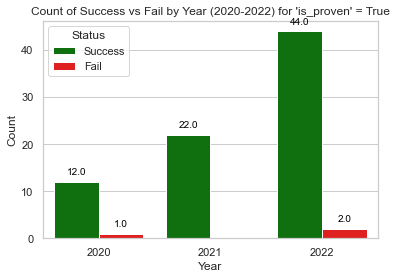

In [371]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for years 2020-2022
filtered_df = df[df['open_year'].between(2020, 2022)]

# Filter the filtered_df for rows where is_proven is True
filtered_is_proven_true = filtered_df[filtered_df['is_proven'] == True]

# Create a bar chart to show counts of success and fail statuses for 'is_proven' = True
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))

ax = sns.countplot(data=filtered_is_proven_true, x='open_year', hue='status', palette={"Success": "green", "Fail": "red"})

plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Count of Success vs Fail by Year (2020-2022) for 'is_proven' = True")

plt.legend(title="Status")

# Annotate the bars with the actual counts
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

## 6.7 Goal

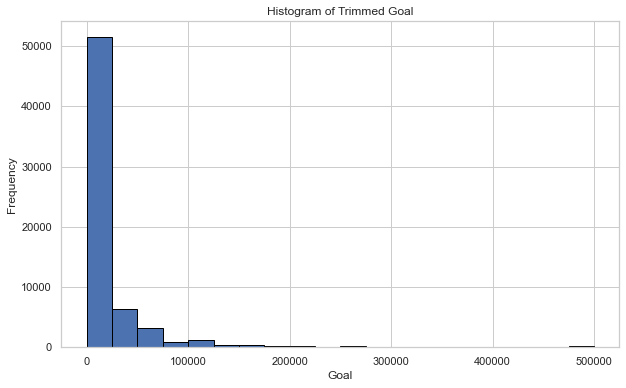

In [372]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your DataFrame named 'df'

# Calculate the trimming limits
trim_lower = df['goal'].quantile(0.01)
trim_upper = df['goal'].quantile(0.99)

# Apply trimming to the data
trimmed_df = df[(df['goal'] >= trim_lower) & (df['goal'] <= trim_upper)]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(trimmed_df['goal'], bins=20, edgecolor='black')
plt.title('Histogram of Trimmed Goal')
plt.xlabel('Goal')
plt.ylabel('Frequency')
plt.show()


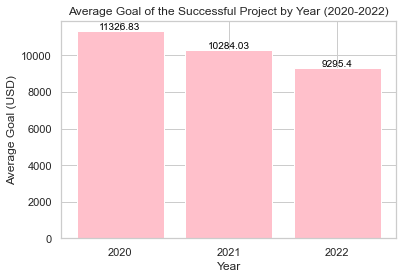

In [373]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your DataFrame named 'df'

# Calculate the trimming limits
trim_lower = df['goal'].quantile(0.01)
trim_upper = df['goal'].quantile(0.99)

# Apply trimming to the data
trimmed_df = df[(df['goal'] >= trim_lower) & (df['goal'] <= trim_upper)]

# Filter data for years 2020-2022
filtered_df = trimmed_df[(trimmed_df['open_year'].between(2020, 2022)) & (trimmed_df['status'] == 'Success')]

# Calculate the average 'goal' for each year
average_goal_by_year = filtered_df.groupby('open_year')['goal'].mean()

# Create a bar chart for average 'goal' values
plt.figure(figsize=(6, 4))
bars = plt.bar(average_goal_by_year.index, average_goal_by_year.values, color='pink')

# Set x-axis ticks to display only the years 2020, 2021, and 2022
plt.xticks([2020, 2021, 2022])

plt.xlabel("Year")
plt.ylabel("Average Goal (USD)")
plt.title("Average Goal of the Successful Project by Year (2020-2022)")

# Adding labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom', ha='center', color='black', fontsize=10)

plt.show()


## 6.8 funds_raised_amount_USD

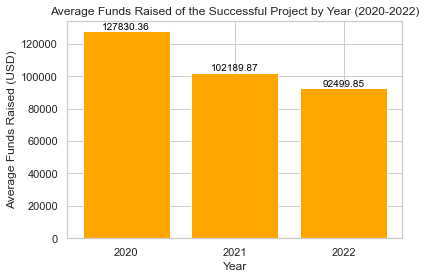

In [374]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your DataFrame named 'df'

# Calculate the trimming limits
trim_lower = df['funds_raised_amount_USD'].quantile(0.01)
trim_upper = df['funds_raised_amount_USD'].quantile(0.99)

# Apply trimming to the data
trimmed_df = df[(df['funds_raised_amount_USD'] >= trim_lower) & (df['goal'] <= trim_upper)]

# Filter data for years 2020-2022
filtered_df = trimmed_df[(trimmed_df['open_year'].between(2020, 2022)) & (trimmed_df['status'] == 'Success')]

# Calculate the average 'goal' for each year
average_goal_by_year = filtered_df.groupby('open_year')['funds_raised_amount_USD'].mean()

# Create a bar chart for average 'goal' values
plt.figure(figsize=(6, 4))
bars = plt.bar(average_goal_by_year.index, average_goal_by_year.values, color='orange')

# Set x-axis ticks to display only the years 2020, 2021, and 2022
plt.xticks([2020, 2021, 2022])

plt.xlabel("Year")
plt.ylabel("Average Funds Raised (USD)")
plt.title("Average Funds Raised of the Successful Project by Year (2020-2022)")

# Adding labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom', ha='center', color='black', fontsize=10)

plt.show()


## 6.9 Duration

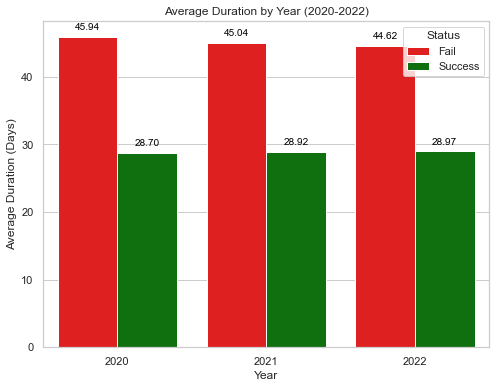

In [375]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for years 2020-2022
filtered_df = df[df['open_year'].between(2020, 2022)]

# Create a bar chart to show the average 'duration' for each year and status
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

ax = sns.barplot(data=filtered_df, x='open_year', y='duration', hue='status', ci=None, palette={"Success": "green", "Fail": "red"})

plt.xlabel("Year")
plt.ylabel("Average Duration (Days)")
plt.title("Average Duration by Year (2020-2022)")

# Annotate the bars with the actual average values
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.legend(title="Status")

plt.show()


## 6.10 Sentiment Score

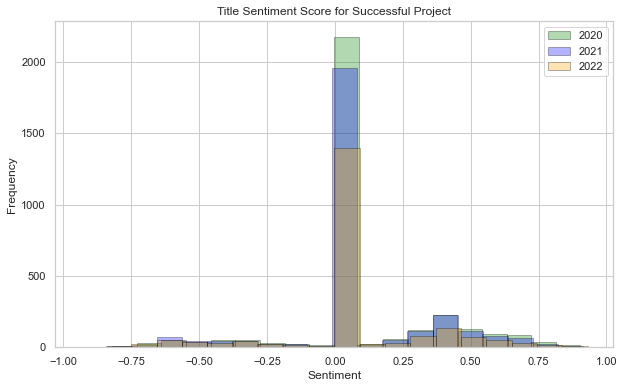

In [376]:
import matplotlib.pyplot as plt

# Filter data for year 2020 and status 'Success'
filtered_df_2020_success = df[(df['open_year'] == 2020) & (df['status'] == 'Success')]
filtered_df_2021_success = df[(df['open_year'] == 2021) & (df['status'] == 'Success')]
filtered_df_2022_success = df[(df['open_year'] == 2022) & (df['status'] == 'Success')]

# Get the sentiment data for success cases in 2020
success_data_2020 = filtered_df_2020_success['compound_sentiment_title']
success_data_2021 = filtered_df_2021_success['compound_sentiment_title']
success_data_2022 = filtered_df_2022_success['compound_sentiment_title']

# Plot the histogram for success cases in 2020
plt.figure(figsize=(10, 6))
plt.hist(success_data_2020, bins=20, edgecolor='black', alpha=0.3, color='green', label='2020')
plt.hist(success_data_2021, bins=20, edgecolor='black', alpha=0.3, color='blue', label='2021')
plt.hist(success_data_2022, bins=20, edgecolor='black', alpha=0.3, color='orange', label='2022')


plt.title('Title Sentiment Score for Successful Project')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.legend()
plt.show()


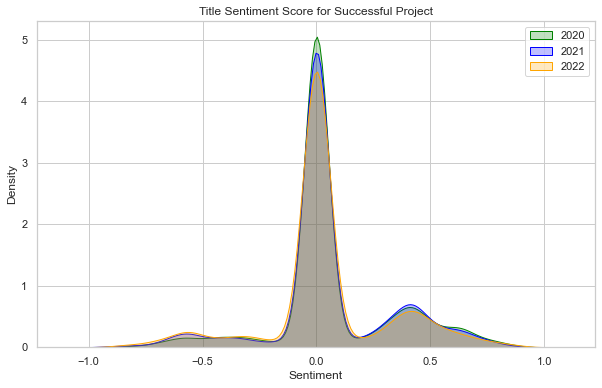

In [408]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for year 2020 and status 'Success'
filtered_df_2020_success = df[(df['open_year'] == 2020) & (df['status'] == 'Success')]
filtered_df_2021_success = df[(df['open_year'] == 2021) & (df['status'] == 'Success')]
filtered_df_2022_success = df[(df['open_year'] == 2022) & (df['status'] == 'Success')]

# Get the sentiment data for success cases in 2020
success_data_2020 = filtered_df_2020_success['compound_sentiment_title']
success_data_2021 = filtered_df_2021_success['compound_sentiment_title']
success_data_2022 = filtered_df_2022_success['compound_sentiment_title']

# Set up the figure and axes
plt.figure(figsize=(10, 6))
sns.kdeplot(success_data_2020, shade=True, color='green', label='2020')
sns.kdeplot(success_data_2021, shade=True, color='blue', label='2021')
sns.kdeplot(success_data_2022, shade=True, color='orange', label='2022')

plt.title('Title Sentiment Score for Successful Project')
plt.xlabel('Sentiment')
plt.ylabel('Density')
plt.legend()
plt.show()


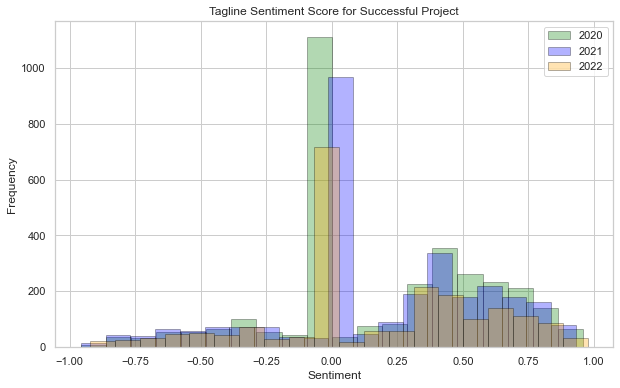

In [378]:
import matplotlib.pyplot as plt

# Filter data for year 2020 and status 'Success'
filtered_df_2020_success = df[(df['open_year'] == 2020) & (df['status'] == 'Success')]
filtered_df_2021_success = df[(df['open_year'] == 2021) & (df['status'] == 'Success')]
filtered_df_2022_success = df[(df['open_year'] == 2022) & (df['status'] == 'Success')]

# Get the sentiment data for success cases in 2020
success_data_2020 = filtered_df_2020_success['compound_sentiment_tagline']
success_data_2021 = filtered_df_2021_success['compound_sentiment_tagline']
success_data_2022 = filtered_df_2022_success['compound_sentiment_tagline']

# Plot the histogram for success cases in 2020
plt.figure(figsize=(10, 6))
plt.hist(success_data_2020, bins=20, edgecolor='black', alpha=0.3, color='green', label='2020')
plt.hist(success_data_2021, bins=20, edgecolor='black', alpha=0.3, color='blue', label='2021')
plt.hist(success_data_2022, bins=20, edgecolor='black', alpha=0.3, color='orange', label='2022')


plt.title('Tagline Sentiment Score for Successful Project')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.legend()
plt.show()


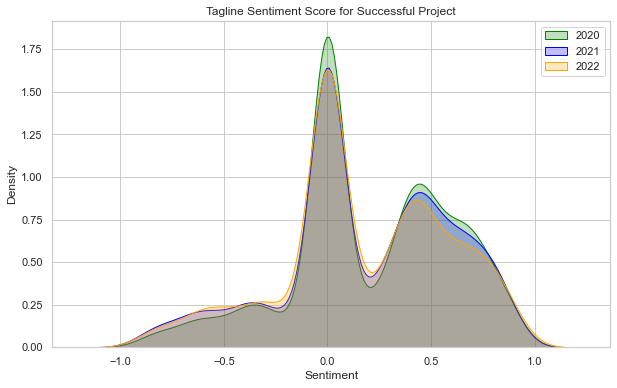

In [379]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for year 2020 and status 'Success'
filtered_df_2020_success = df[(df['open_year'] == 2020) & (df['status'] == 'Success')]
filtered_df_2021_success = df[(df['open_year'] == 2021) & (df['status'] == 'Success')]
filtered_df_2022_success = df[(df['open_year'] == 2022) & (df['status'] == 'Success')]

# Get the sentiment data for success cases in 2020
success_data_2020 = filtered_df_2020_success['compound_sentiment_tagline']
success_data_2021 = filtered_df_2021_success['compound_sentiment_tagline']
success_data_2022 = filtered_df_2022_success['compound_sentiment_tagline']

# Set up the figure and axes
plt.figure(figsize=(10, 6))
sns.kdeplot(success_data_2020, shade=True, color='green', label='2020')
sns.kdeplot(success_data_2021, shade=True, color='blue', label='2021')
sns.kdeplot(success_data_2022, shade=True, color='orange', label='2022')

plt.title('Tagline Sentiment Score for Successful Project')
plt.xlabel('Sentiment')
plt.ylabel('Density')
plt.legend()
plt.show()


## 6.10 Emotional score

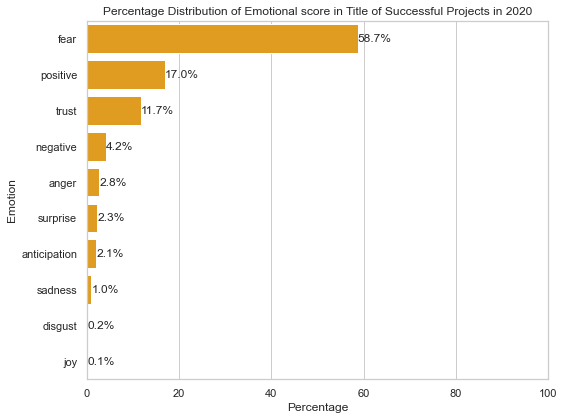

In [380]:
# Filter the DataFrame for year 2020 and status 'success'
df_2020_success = df[(df['open_year'] == 2020) & (df['Status_Boo'] == 1)]

# Calculate the percentage distribution for the year 2020
percentage_distribution_success_2020 = df_2020_success['emotional_title'].value_counts(normalize=True) * 100

# Sort the percentage distribution in descending order
percentage_distribution_success_2020 = percentage_distribution_success_2020.sort_values(ascending=False)

# Create the bar chart with a single color
plt.figure(figsize=(8, 6))
sns.barplot(x=percentage_distribution_success_2020.values, y=percentage_distribution_success_2020.index, color='orange')
plt.xlabel("Percentage")
plt.ylabel("Emotion")
plt.title("Percentage Distribution of Emotional score in Title of Successful Projects in 2020")
plt.xlim(0, 100)

# Add labels to the bars
for index, value in enumerate(percentage_distribution_success_2020):
    plt.text(value, index, f'{value:.1f}%', ha='left', va='center')

plt.tight_layout()
plt.show()

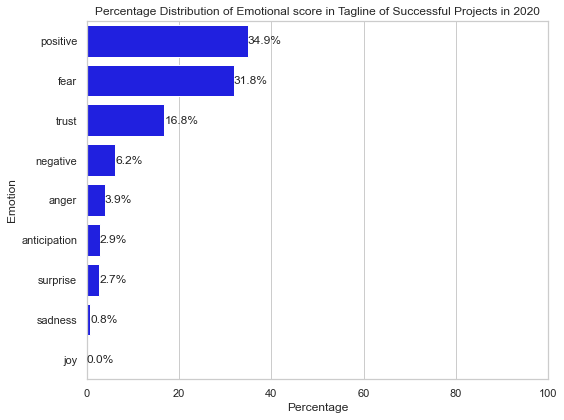

In [381]:
# Filter the DataFrame for year 2020 and status 'success'
df_2020_success = df[(df['open_year'] == 2020) & (df['Status_Boo'] == 1)]

# Calculate the percentage distribution for the year 2020
percentage_distribution_success_2020 = df_2020_success['emotional_tagline'].value_counts(normalize=True) * 100

# Sort the percentage distribution in descending order
percentage_distribution_success_2020 = percentage_distribution_success_2020.sort_values(ascending=False)

# Create the bar chart with a single color
plt.figure(figsize=(8, 6))
sns.barplot(x=percentage_distribution_success_2020.values, y=percentage_distribution_success_2020.index, color='blue')
plt.xlabel("Percentage")
plt.ylabel("Emotion")
plt.title("Percentage Distribution of Emotional score in Tagline of Successful Projects in 2020")
plt.xlim(0, 100)

# Add labels to the bars
for index, value in enumerate(percentage_distribution_success_2020):
    plt.text(value, index, f'{value:.1f}%', ha='left', va='center')

plt.tight_layout()
plt.show()

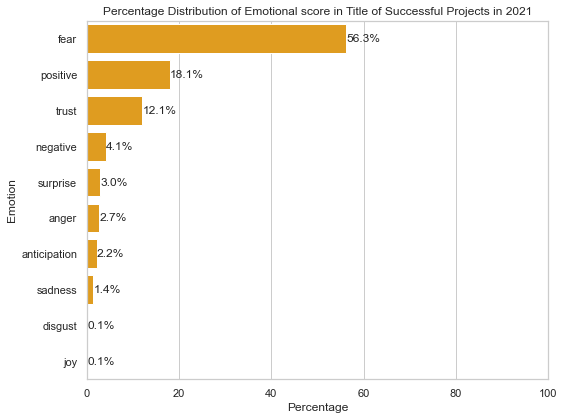

In [382]:
# Filter the DataFrame for year 2021 and status 'success'
df_2021_success = df[(df['open_year'] == 2021) & (df['Status_Boo'] == 1)]

# Calculate the percentage distribution for the year 2021
percentage_distribution_success_2021 = df_2021_success['emotional_title'].value_counts(normalize=True) * 100

# Sort the percentage distribution in descending order
percentage_distribution_success_2021 = percentage_distribution_success_2021.sort_values(ascending=False)

# Create the bar chart with a single color
plt.figure(figsize=(8, 6))
sns.barplot(x=percentage_distribution_success_2021.values, y=percentage_distribution_success_2021.index, color='orange')
plt.xlabel("Percentage")
plt.ylabel("Emotion")
plt.title("Percentage Distribution of Emotional score in Title of Successful Projects in 2021")
plt.xlim(0, 100)

# Add labels to the bars
for index, value in enumerate(percentage_distribution_success_2021):
    plt.text(value, index, f'{value:.1f}%', ha='left', va='center')

plt.tight_layout()
plt.show()

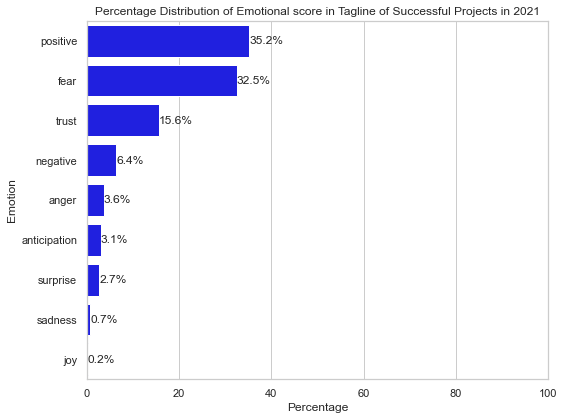

In [383]:
# Filter the DataFrame for year 2021 and status 'success'
df_2021_success = df[(df['open_year'] == 2021) & (df['Status_Boo'] == 1)]

# Calculate the percentage distribution for the year 2021
percentage_distribution_success_2021 = df_2021_success['emotional_tagline'].value_counts(normalize=True) * 100

# Sort the percentage distribution in descending order
percentage_distribution_success_2021 = percentage_distribution_success_2021.sort_values(ascending=False)

# Create the bar chart with a single color
plt.figure(figsize=(8, 6))
sns.barplot(x=percentage_distribution_success_2021.values, y=percentage_distribution_success_2021.index, color='blue')
plt.xlabel("Percentage")
plt.ylabel("Emotion")
plt.title("Percentage Distribution of Emotional score in Tagline of Successful Projects in 2021")
plt.xlim(0, 100)

# Add labels to the bars
for index, value in enumerate(percentage_distribution_success_2021):
    plt.text(value, index, f'{value:.1f}%', ha='left', va='center')

plt.tight_layout()
plt.show()

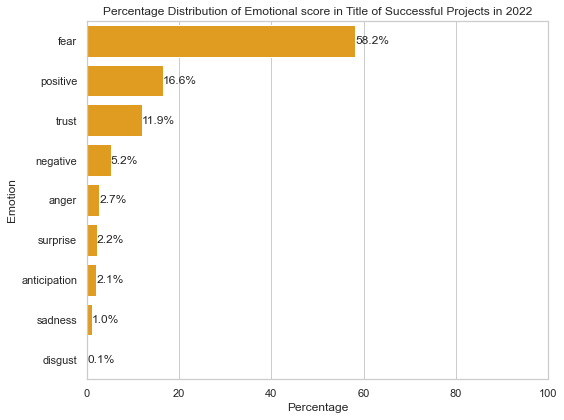

In [384]:
# Filter the DataFrame for year 2022 and status 'success'
df_2022_success = df[(df['open_year'] == 2022) & (df['Status_Boo'] == 1)]

# Calculate the percentage distribution for the year 2021
percentage_distribution_success_2022 = df_2022_success['emotional_title'].value_counts(normalize=True) * 100

# Sort the percentage distribution in descending order
percentage_distribution_success_2022 = percentage_distribution_success_2022.sort_values(ascending=False)

# Create the bar chart with a single color
plt.figure(figsize=(8, 6))
sns.barplot(x=percentage_distribution_success_2022.values, y=percentage_distribution_success_2022.index, color='orange')
plt.xlabel("Percentage")
plt.ylabel("Emotion")
plt.title("Percentage Distribution of Emotional score in Title of Successful Projects in 2022")
plt.xlim(0, 100)

# Add labels to the bars
for index, value in enumerate(percentage_distribution_success_2022):
    plt.text(value, index, f'{value:.1f}%', ha='left', va='center')

plt.tight_layout()
plt.show()

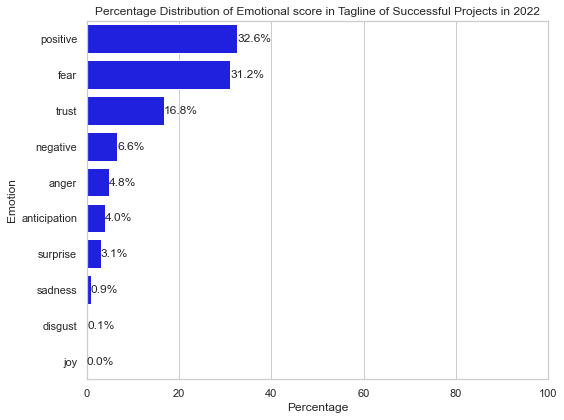

In [385]:
# Filter the DataFrame for year 2022 and status 'success'
df_2022_success = df[(df['open_year'] == 2022) & (df['Status_Boo'] == 1)]

# Calculate the percentage distribution for the year 2021
percentage_distribution_success_2022 = df_2022_success['emotional_tagline'].value_counts(normalize=True) * 100

# Sort the percentage distribution in descending order
percentage_distribution_success_2022 = percentage_distribution_success_2022.sort_values(ascending=False)

# Create the bar chart with a single color
plt.figure(figsize=(8, 6))
sns.barplot(x=percentage_distribution_success_2022.values, y=percentage_distribution_success_2022.index, color='blue')
plt.xlabel("Percentage")
plt.ylabel("Emotion")
plt.title("Percentage Distribution of Emotional score in Tagline of Successful Projects in 2022")
plt.xlim(0, 100)

# Add labels to the bars
for index, value in enumerate(percentage_distribution_success_2022):
    plt.text(value, index, f'{value:.1f}%', ha='left', va='center')

plt.tight_layout()
plt.show()

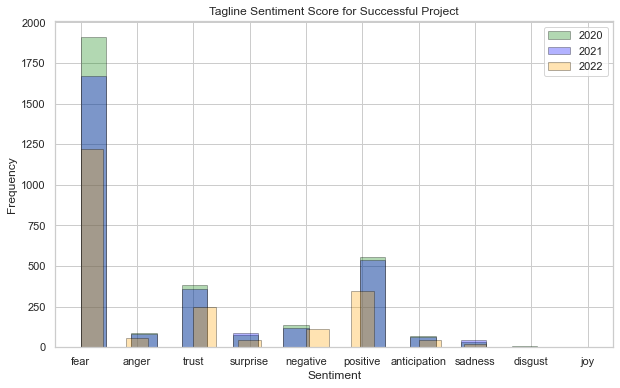

In [386]:
import matplotlib.pyplot as plt

# Filter data for year 2020 and status 'Success'
filtered_df_2020_success = df[(df['open_year'] == 2020) & (df['status'] == 'Success')]
filtered_df_2021_success = df[(df['open_year'] == 2021) & (df['status'] == 'Success')]
filtered_df_2022_success = df[(df['open_year'] == 2022) & (df['status'] == 'Success')]

# Get the sentiment data for success cases in 2020
success_data_2020 = filtered_df_2020_success['emotional_title']
success_data_2021 = filtered_df_2021_success['emotional_title']
success_data_2022 = filtered_df_2022_success['emotional_title']

# Plot the histogram for success cases in 2020
plt.figure(figsize=(10, 6))
plt.hist(success_data_2020, bins=20, edgecolor='black', alpha=0.3, color='green', label='2020')
plt.hist(success_data_2021, bins=20, edgecolor='black', alpha=0.3, color='blue', label='2021')
plt.hist(success_data_2022, bins=20, edgecolor='black', alpha=0.3, color='orange', label='2022')


plt.title('Tagline Sentiment Score for Successful Project')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.legend()
plt.show()


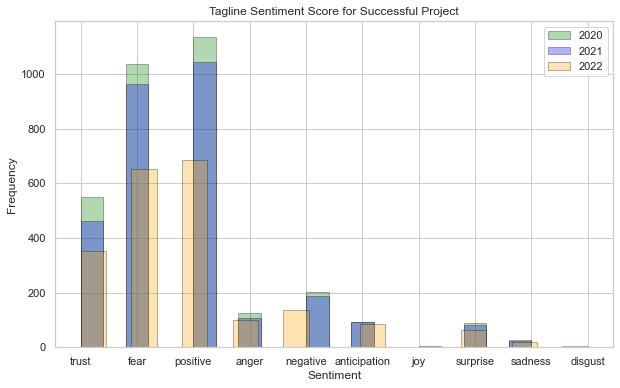

In [387]:
import matplotlib.pyplot as plt

# Filter data for year 2020 and status 'Success'
filtered_df_2020_success = df[(df['open_year'] == 2020) & (df['status'] == 'Success')]
filtered_df_2021_success = df[(df['open_year'] == 2021) & (df['status'] == 'Success')]
filtered_df_2022_success = df[(df['open_year'] == 2022) & (df['status'] == 'Success')]

# Get the sentiment data for success cases in 2020
success_data_2020 = filtered_df_2020_success['emotional_tagline']
success_data_2021 = filtered_df_2021_success['emotional_tagline']
success_data_2022 = filtered_df_2022_success['emotional_tagline']

# Plot the histogram for success cases in 2020
plt.figure(figsize=(10, 6))
plt.hist(success_data_2020, bins=20, edgecolor='black', alpha=0.3, color='green', label='2020')
plt.hist(success_data_2021, bins=20, edgecolor='black', alpha=0.3, color='blue', label='2021')
plt.hist(success_data_2022, bins=20, edgecolor='black', alpha=0.3, color='orange', label='2022')


plt.title('Tagline Sentiment Score for Successful Project')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.legend()
plt.show()


## 6.11

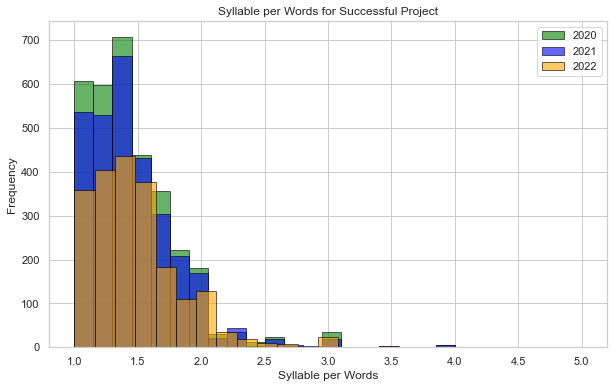

In [388]:
import matplotlib.pyplot as plt

# Filter data for year 2020 and status 'Success'
filtered_df_2020_success = df[(df['open_year'] == 2020) & (df['status'] == 'Success')]
filtered_df_2021_success = df[(df['open_year'] == 2021) & (df['status'] == 'Success')]
filtered_df_2022_success = df[(df['open_year'] == 2022) & (df['status'] == 'Success')]

# Get the sentiment data for success cases in 2020
success_data_2020 = filtered_df_2020_success['syl_per_word_title' ]
success_data_2021 = filtered_df_2021_success['syl_per_word_title' ]
success_data_2022 = filtered_df_2022_success['syl_per_word_title' ]

# Plot the histogram for success cases in 2020
plt.figure(figsize=(10, 6))
plt.hist(success_data_2020, bins=20, edgecolor='black', alpha=0.6, color='green', label='2020')
plt.hist(success_data_2021, bins=20, edgecolor='black', alpha=0.6, color='blue', label='2021')
plt.hist(success_data_2022, bins=25, edgecolor='black', alpha=0.6, color='orange', label='2022')


plt.title('Syllable per Words for Successful Project')
plt.xlabel('Syllable per Words')
plt.ylabel('Frequency')
plt.legend()
plt.show()

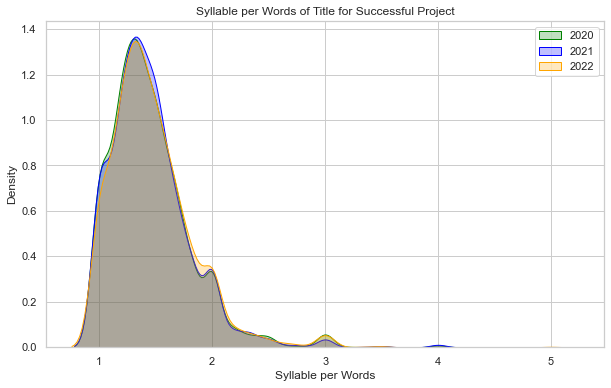

In [389]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for year 2020 and status 'Success'
filtered_df_2020_success = df[(df['open_year'] == 2020) & (df['status'] == 'Success')]
filtered_df_2021_success = df[(df['open_year'] == 2021) & (df['status'] == 'Success')]
filtered_df_2022_success = df[(df['open_year'] == 2022) & (df['status'] == 'Success')]

# Get the sentiment data for success cases in 2020
success_data_2020 = filtered_df_2020_success['syl_per_word_title']
success_data_2021 = filtered_df_2021_success['syl_per_word_title']
success_data_2022 = filtered_df_2022_success['syl_per_word_title']

# Set up the figure and axes
plt.figure(figsize=(10, 6))
sns.kdeplot(success_data_2020, shade=True, color='green', label='2020')
sns.kdeplot(success_data_2021, shade=True, color='blue', label='2021')
sns.kdeplot(success_data_2022, shade=True, color='orange', label='2022')

plt.title('Syllable per Words of Title for Successful Project')
plt.xlabel('Syllable per Words')
plt.ylabel('Density')
plt.legend()
plt.show()


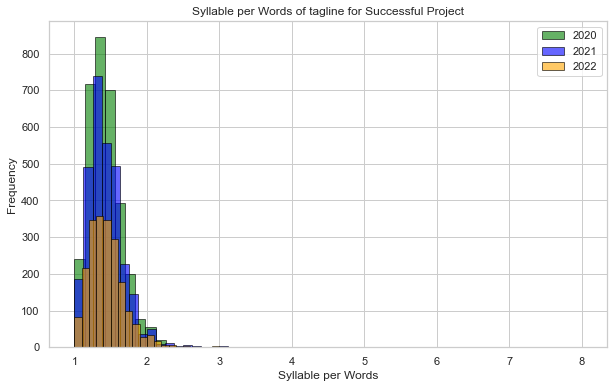

In [390]:
import matplotlib.pyplot as plt

# Filter data for year 2020 and status 'Success'
filtered_df_2020_success = df[(df['open_year'] == 2020) & (df['status'] == 'Success')]
filtered_df_2021_success = df[(df['open_year'] == 2021) & (df['status'] == 'Success')]
filtered_df_2022_success = df[(df['open_year'] == 2022) & (df['status'] == 'Success')]

# Get the sentiment data for success cases in 2020
success_data_2020 = filtered_df_2020_success['syl_per_word_tagline' ]
success_data_2021 = filtered_df_2021_success['syl_per_word_tagline' ]
success_data_2022 = filtered_df_2022_success['syl_per_word_tagline' ]

# Plot the histogram for success cases in 2020
plt.figure(figsize=(10, 6))
plt.hist(success_data_2020, bins=50, edgecolor='black', alpha=0.6, color='green', label='2020')
plt.hist(success_data_2021, bins=20, edgecolor='black', alpha=0.6, color='blue', label='2021')
plt.hist(success_data_2022, bins=20, edgecolor='black', alpha=0.6, color='orange', label='2022')


plt.title('Syllable per Words of tagline for Successful Project')
plt.xlabel('Syllable per Words')
plt.ylabel('Frequency')
plt.legend()
plt.show()

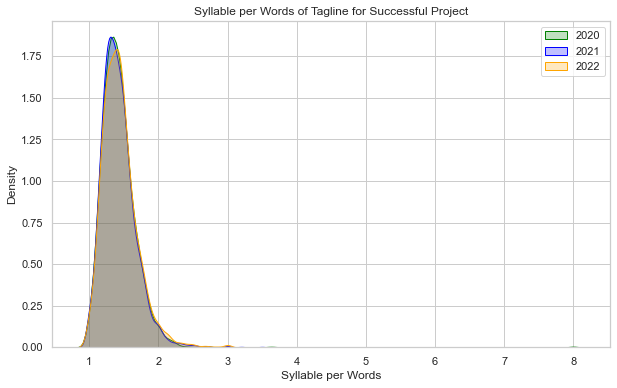

In [391]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for year 2020 and status 'Success'
filtered_df_2020_success = df[(df['open_year'] == 2020) & (df['status'] == 'Success')]
filtered_df_2021_success = df[(df['open_year'] == 2021) & (df['status'] == 'Success')]
filtered_df_2022_success = df[(df['open_year'] == 2022) & (df['status'] == 'Success')]

# Get the sentiment data for success cases in 2020
success_data_2020 = filtered_df_2020_success['syl_per_word_tagline']
success_data_2021 = filtered_df_2021_success['syl_per_word_tagline']
success_data_2022 = filtered_df_2022_success['syl_per_word_tagline']

# Set up the figure and axes
plt.figure(figsize=(10, 6))
sns.kdeplot(success_data_2020, shade=True, color='green', label='2020')
sns.kdeplot(success_data_2021, shade=True, color='blue', label='2021')
sns.kdeplot(success_data_2022, shade=True, color='orange', label='2022')

plt.title('Syllable per Words of Tagline for Successful Project')
plt.xlabel('Syllable per Words')
plt.ylabel('Density')
plt.legend()
plt.show()


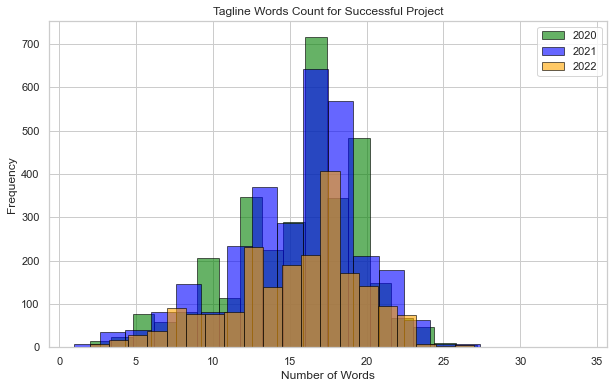

In [392]:
import matplotlib.pyplot as plt

# Filter data for year 2020 and status 'Success'
filtered_df_2020_success = df[(df['open_year'] == 2020) & (df['status'] == 'Success')]
filtered_df_2021_success = df[(df['open_year'] == 2021) & (df['status'] == 'Success')]
filtered_df_2022_success = df[(df['open_year'] == 2022) & (df['status'] == 'Success')]

# Get the sentiment data for success cases in 2020
success_data_2020 = filtered_df_2020_success['WordCnt_tagline']
success_data_2021 = filtered_df_2021_success['WordCnt_tagline']
success_data_2022 = filtered_df_2022_success['WordCnt_tagline']

# Plot the histogram for success cases in 2020
plt.figure(figsize=(10, 6))
plt.hist(success_data_2020, bins=20, edgecolor='black', alpha=0.6, color='green', label='2020')
plt.hist(success_data_2021, bins=20, edgecolor='black', alpha=0.6, color='blue', label='2021')
plt.hist(success_data_2022, bins=20, edgecolor='black', alpha=0.6, color='orange', label='2022')


plt.title('Tagline Words Count for Successful Project')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend()
plt.show()

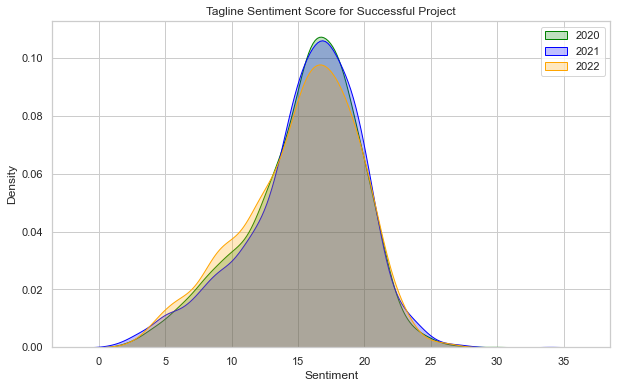

In [393]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for year 2020 and status 'Success'
filtered_df_2020_success = df[(df['open_year'] == 2020) & (df['status'] == 'Success')]
filtered_df_2021_success = df[(df['open_year'] == 2021) & (df['status'] == 'Success')]
filtered_df_2022_success = df[(df['open_year'] == 2022) & (df['status'] == 'Success')]

# Get the sentiment data for success cases in 2020
success_data_2020 = filtered_df_2020_success['WordCnt_tagline']
success_data_2021 = filtered_df_2021_success['WordCnt_tagline']
success_data_2022 = filtered_df_2022_success['WordCnt_tagline']

# Set up the figure and axes
plt.figure(figsize=(10, 6))
sns.kdeplot(success_data_2020, shade=True, color='green', label='2020')
sns.kdeplot(success_data_2021, shade=True, color='blue', label='2021')
sns.kdeplot(success_data_2022, shade=True, color='orange', label='2022')

plt.title('Tagline Sentiment Score for Successful Project')
plt.xlabel('Sentiment')
plt.ylabel('Density')
plt.legend()
plt.show()


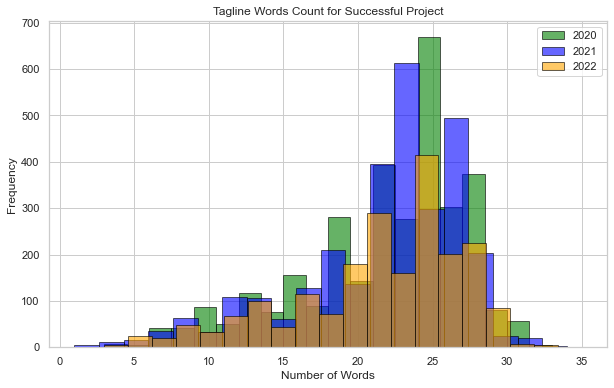

In [394]:
import matplotlib.pyplot as plt

# Filter data for year 2020 and status 'Success'
filtered_df_2020_success = df[(df['open_year'] == 2020) & (df['status'] == 'Success')]
filtered_df_2021_success = df[(df['open_year'] == 2021) & (df['status'] == 'Success')]
filtered_df_2022_success = df[(df['open_year'] == 2022) & (df['status'] == 'Success')]

# Get the sentiment data for success cases in 2020
success_data_2020 = filtered_df_2020_success['SylCnt_tagline']
success_data_2021 = filtered_df_2021_success['SylCnt_tagline']
success_data_2022 = filtered_df_2022_success['SylCnt_tagline']

# Plot the histogram for success cases in 2020
plt.figure(figsize=(10, 6))
plt.hist(success_data_2020, bins=20, edgecolor='black', alpha=0.6, color='green', label='2020')
plt.hist(success_data_2021, bins=20, edgecolor='black', alpha=0.6, color='blue', label='2021')
plt.hist(success_data_2022, bins=20, edgecolor='black', alpha=0.6, color='orange', label='2022')


plt.title('Tagline Words Count for Successful Project')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend()
plt.show()

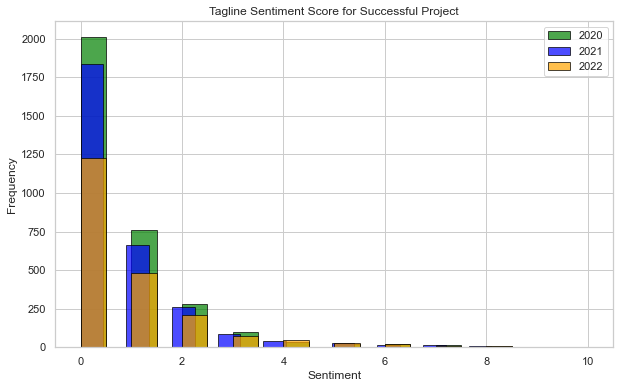

In [395]:
import matplotlib.pyplot as plt

# Filter data for year 2020 and status 'Success'
filtered_df_2020_success = df[(df['open_year'] == 2020) & (df['status'] == 'Success')]
filtered_df_2021_success = df[(df['open_year'] == 2021) & (df['status'] == 'Success')]
filtered_df_2022_success = df[(df['open_year'] == 2022) & (df['status'] == 'Success')]

# Get the sentiment data for success cases in 2020
success_data_2020 = filtered_df_2020_success['UpperCnt']
success_data_2021 = filtered_df_2021_success['UpperCnt']
success_data_2022 = filtered_df_2022_success['UpperCnt']

# Plot the histogram for success cases in 2020
plt.figure(figsize=(10, 6))
plt.hist(success_data_2020, bins=20, edgecolor='black', alpha=0.7, color='green', label='2020')
plt.hist(success_data_2021, bins=20, edgecolor='black', alpha=0.7, color='blue', label='2021')
plt.hist(success_data_2022, bins=20, edgecolor='black', alpha=0.7, color='orange', label='2022')


plt.title('Tagline Sentiment Score for Successful Project')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.legend()
plt.show()

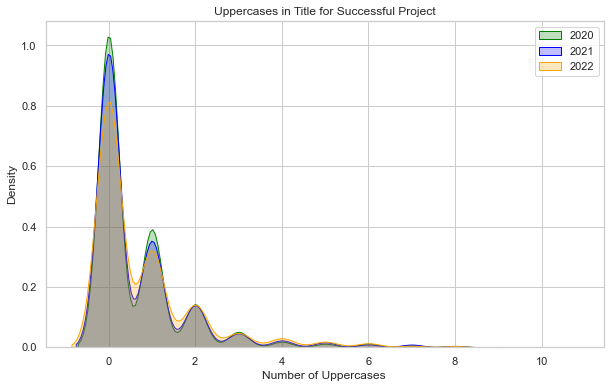

In [396]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for year 2020 and status 'Success'
filtered_df_2020_success = df[(df['open_year'] == 2020) & (df['status'] == 'Success')]
filtered_df_2021_success = df[(df['open_year'] == 2021) & (df['status'] == 'Success')]
filtered_df_2022_success = df[(df['open_year'] == 2022) & (df['status'] == 'Success')]

# Get the sentiment data for success cases in 2020
success_data_2020 = filtered_df_2020_success['UpperCnt']
success_data_2021 = filtered_df_2021_success['UpperCnt']
success_data_2022 = filtered_df_2022_success['UpperCnt']

# Set up the figure and axes
plt.figure(figsize=(10, 6))
sns.kdeplot(success_data_2020, shade=True, color='green', label='2020')
sns.kdeplot(success_data_2021, shade=True, color='blue', label='2021')
sns.kdeplot(success_data_2022, shade=True, color='orange', label='2022')

plt.title('Uppercases in Title for Successful Project')
plt.xlabel('Number of Uppercases ')
plt.ylabel('Density')
plt.legend()
plt.show()


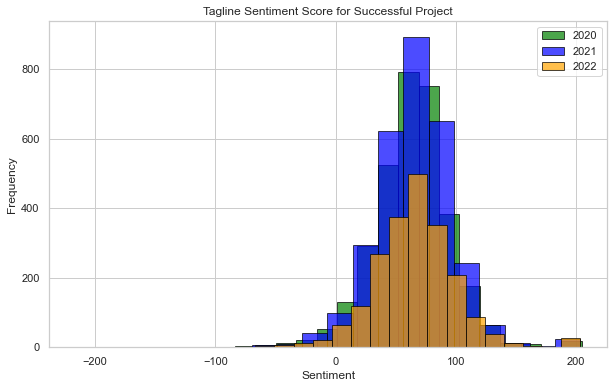

In [397]:
import matplotlib.pyplot as plt

# Filter data for year 2020 and status 'Success'
filtered_df_2020_success = df[(df['open_year'] == 2020) & (df['status'] == 'Success')]
filtered_df_2021_success = df[(df['open_year'] == 2021) & (df['status'] == 'Success')]
filtered_df_2022_success = df[(df['open_year'] == 2022) & (df['status'] == 'Success')]

# Get the sentiment data for success cases in 2020
success_data_2020 = filtered_df_2020_success['FREScore_tagline']
success_data_2021 = filtered_df_2021_success['FREScore_tagline']
success_data_2022 = filtered_df_2022_success['FREScore_tagline']

# Plot the histogram for success cases in 2020
plt.figure(figsize=(10, 6))
plt.hist(success_data_2020, bins=20, edgecolor='black', alpha=0.7, color='green', label='2020')
plt.hist(success_data_2021, bins=20, edgecolor='black', alpha=0.7, color='blue', label='2021')
plt.hist(success_data_2022, bins=20, edgecolor='black', alpha=0.7, color='orange', label='2022')


plt.title('Tagline Sentiment Score for Successful Project')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.legend()
plt.show()

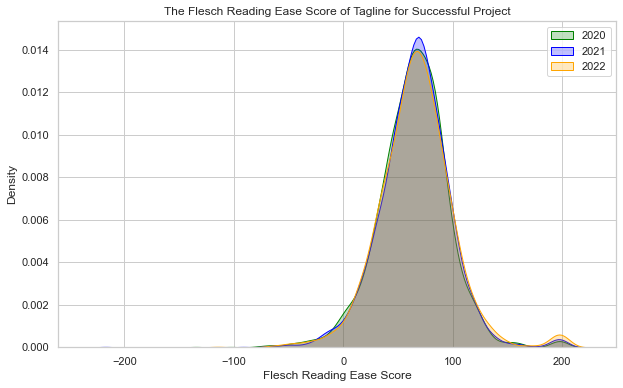

In [398]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for year 2020 and status 'Success'
filtered_df_2020_success = df[(df['open_year'] == 2020) & (df['status'] == 'Success')]
filtered_df_2021_success = df[(df['open_year'] == 2021) & (df['status'] == 'Success')]
filtered_df_2022_success = df[(df['open_year'] == 2022) & (df['status'] == 'Success')]

# Get the sentiment data for success cases in 2020
success_data_2020 = filtered_df_2020_success['FREScore_tagline']
success_data_2021 = filtered_df_2021_success['FREScore_tagline']
success_data_2022 = filtered_df_2022_success['FREScore_tagline']

# Set up the figure and axes
plt.figure(figsize=(10, 6))
sns.kdeplot(success_data_2020, shade=True, color='green', label='2020')
sns.kdeplot(success_data_2021, shade=True, color='blue', label='2021')
sns.kdeplot(success_data_2022, shade=True, color='orange', label='2022')

plt.title('The Flesch Reading Ease Score of Tagline for Successful Project')
plt.xlabel('Flesch Reading Ease Score')
plt.ylabel('Density')
plt.legend()
plt.show()


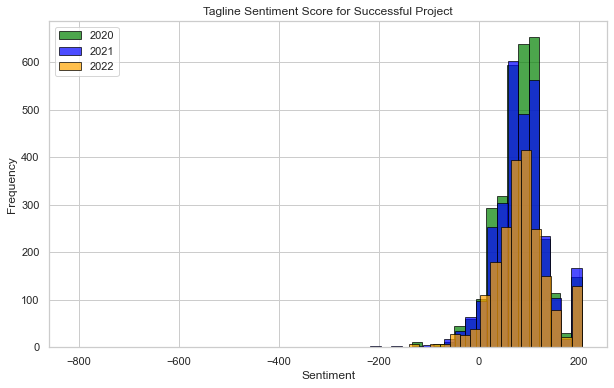

In [399]:
import matplotlib.pyplot as plt

# Filter data for year 2020 and status 'Success'
filtered_df_2020_success = df[(df['open_year'] == 2020) & (df['status'] == 'Success')]
filtered_df_2021_success = df[(df['open_year'] == 2021) & (df['status'] == 'Success')]
filtered_df_2022_success = df[(df['open_year'] == 2022) & (df['status'] == 'Success')]

# Get the sentiment data for success cases in 2020
success_data_2020 = filtered_df_2020_success['FREScore_title']
success_data_2021 = filtered_df_2021_success['FREScore_title']
success_data_2022 = filtered_df_2022_success['FREScore_title']

# Plot the histogram for success cases in 2020
plt.figure(figsize=(10, 6))
plt.hist(success_data_2020, bins=20, edgecolor='black', alpha=0.7, color='green', label='2020')
plt.hist(success_data_2021, bins=20, edgecolor='black', alpha=0.7, color='blue', label='2021')
plt.hist(success_data_2022, bins=50, edgecolor='black', alpha=0.7, color='orange', label='2022')


plt.title('Tagline Sentiment Score for Successful Project')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.legend()
plt.show()

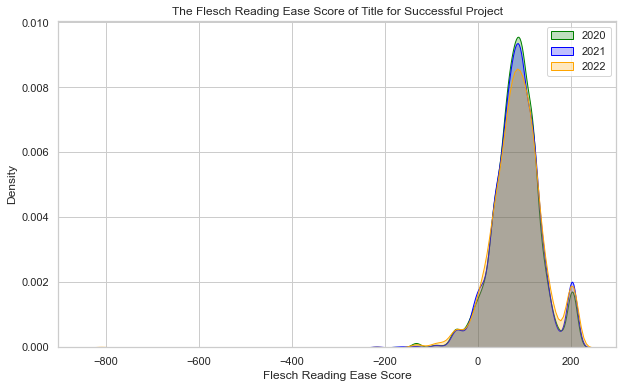

In [400]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for year 2020 and status 'Success'
filtered_df_2020_success = df[(df['open_year'] == 2020) & (df['status'] == 'Success')]
filtered_df_2021_success = df[(df['open_year'] == 2021) & (df['status'] == 'Success')]
filtered_df_2022_success = df[(df['open_year'] == 2022) & (df['status'] == 'Success')]

# Get the sentiment data for success cases in 2020
success_data_2020 = filtered_df_2020_success['FREScore_title']
success_data_2021 = filtered_df_2021_success['FREScore_title']
success_data_2022 = filtered_df_2022_success['FREScore_title']

# Set up the figure and axes
plt.figure(figsize=(10, 6))
sns.kdeplot(success_data_2020, shade=True, color='green', label='2020')
sns.kdeplot(success_data_2021, shade=True, color='blue', label='2021')
sns.kdeplot(success_data_2022, shade=True, color='orange', label='2022')

plt.title('The Flesch Reading Ease Score of Title for Successful Project')
plt.xlabel('Flesch Reading Ease Score')
plt.ylabel('Density')
plt.legend()
plt.show()


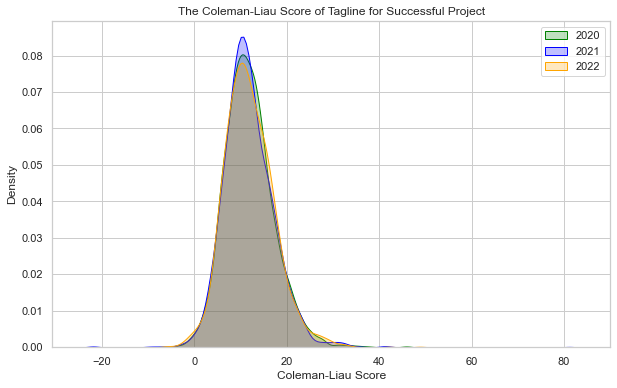

In [401]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for year 2020 and status 'Success'
filtered_df_2020_success = df[(df['open_year'] == 2020) & (df['status'] == 'Success')]
filtered_df_2021_success = df[(df['open_year'] == 2021) & (df['status'] == 'Success')]
filtered_df_2022_success = df[(df['open_year'] == 2022) & (df['status'] == 'Success')]

# Get the sentiment data for success cases in 2020
success_data_2020 = filtered_df_2020_success['ColScore_tagline']
success_data_2021 = filtered_df_2021_success['ColScore_tagline']
success_data_2022 = filtered_df_2022_success['ColScore_tagline']

# Set up the figure and axes
plt.figure(figsize=(10, 6))
sns.kdeplot(success_data_2020, shade=True, color='green', label='2020')
sns.kdeplot(success_data_2021, shade=True, color='blue', label='2021')
sns.kdeplot(success_data_2022, shade=True, color='orange', label='2022')

plt.title('The Coleman-Liau Score of Tagline for Successful Project')
plt.xlabel('Coleman-Liau Score')
plt.ylabel('Density')
plt.legend()
plt.show()


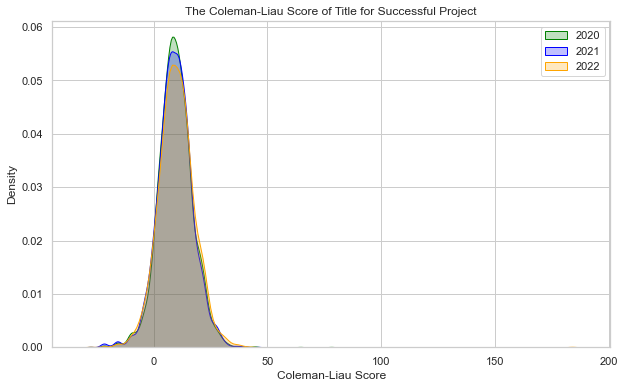

In [402]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for year 2020 and status 'Success'
filtered_df_2020_success = df[(df['open_year'] == 2020) & (df['status'] == 'Success')]
filtered_df_2021_success = df[(df['open_year'] == 2021) & (df['status'] == 'Success')]
filtered_df_2022_success = df[(df['open_year'] == 2022) & (df['status'] == 'Success')]

# Get the sentiment data for success cases in 2020
success_data_2020 = filtered_df_2020_success['ColScore_title']
success_data_2021 = filtered_df_2021_success['ColScore_title']
success_data_2022 = filtered_df_2022_success['ColScore_title']

# Set up the figure and axes
plt.figure(figsize=(10, 6))
sns.kdeplot(success_data_2020, shade=True, color='green', label='2020')
sns.kdeplot(success_data_2021, shade=True, color='blue', label='2021')
sns.kdeplot(success_data_2022, shade=True, color='orange', label='2022')

plt.title('The Coleman-Liau Score of Title for Successful Project')
plt.xlabel('Coleman-Liau Score')
plt.ylabel('Density')
plt.legend()
plt.show()


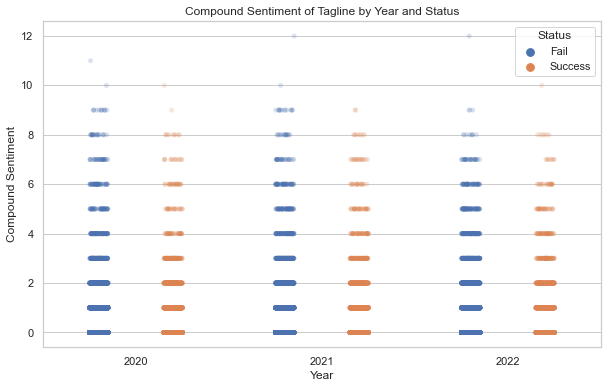

In [403]:
# Filter data for years 2020-2022
filtered_df = df[df['open_year'].between(2020, 2022)]

# Set up the Seaborn style
sns.set(style="whitegrid")

# Create a strip plot with 50% transparent dots
plt.figure(figsize=(10, 6))
sns.stripplot(
    data=filtered_df,
    y='UpperCnt',
    x='open_year',
    hue='status',
    dodge=True,
    marker='o',
    alpha=0.2  # Adjust transparency here
)
plt.title('Compound Sentiment of Tagline by Year and Status')
plt.xlabel('Year')
plt.ylabel('Compound Sentiment')
plt.legend(title='Status')
plt.show()

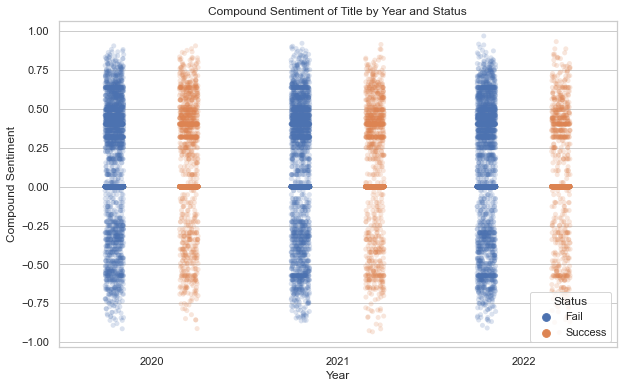

In [404]:
# Filter data for years 2020-2022
filtered_df = df[df['open_year'].between(2020, 2022)]

# Set up the Seaborn style
sns.set(style="whitegrid")

# Create a strip plot with 50% transparent dots
plt.figure(figsize=(10, 6))
sns.stripplot(
    data=filtered_df,
    y='compound_sentiment_title',
    x='open_year',
    hue='status',
    dodge=True,
    marker='o',
    alpha=0.2  # Adjust transparency here
)
plt.title('Compound Sentiment of Title by Year and Status')
plt.xlabel('Year')
plt.ylabel('Compound Sentiment')
plt.legend(title='Status')
plt.show()

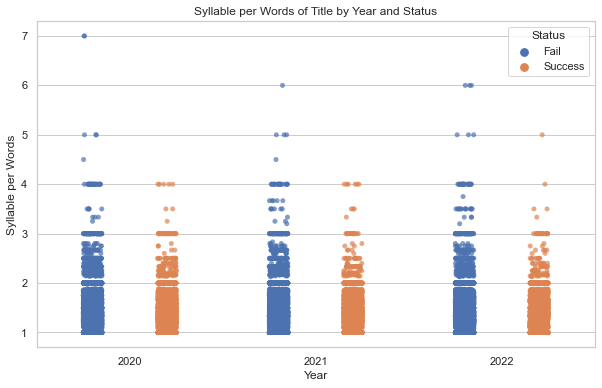

In [405]:
# Filter data for years 2020-2022
filtered_df = df[df['open_year'].between(2020, 2022)]

# Set up the Seaborn style
sns.set(style="whitegrid")

# Create a strip plot
plt.figure(figsize=(10, 6))
sns.stripplot(data=filtered_df, y='syl_per_word_title', x='open_year', hue='status', dodge=True, marker='o', alpha=0.7)
plt.title('Syllable per Words of Title by Year and Status')
plt.xlabel('Year')
plt.ylabel('Syllable per Words')
plt.legend(title='Status')
plt.show()

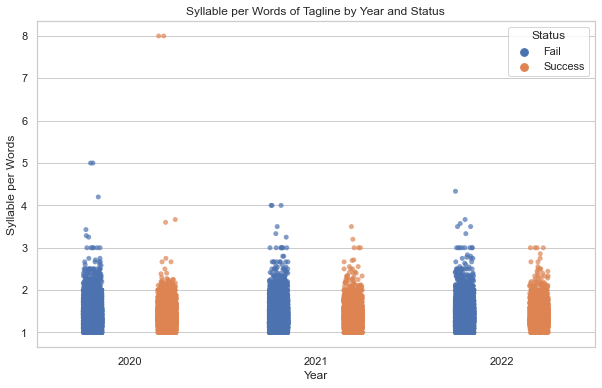

In [406]:
# Filter data for years 2020-2022
filtered_df = df[df['open_year'].between(2020, 2022)]

# Set up the Seaborn style
sns.set(style="whitegrid")

# Create a strip plot
plt.figure(figsize=(10, 6))
sns.stripplot(data=filtered_df, y='syl_per_word_tagline', x='open_year', hue='status', dodge=True, marker='o', alpha=0.7)
plt.title('Syllable per Words of Tagline by Year and Status')
plt.xlabel('Year')
plt.ylabel('Syllable per Words')
plt.legend(title='Status')
plt.show()

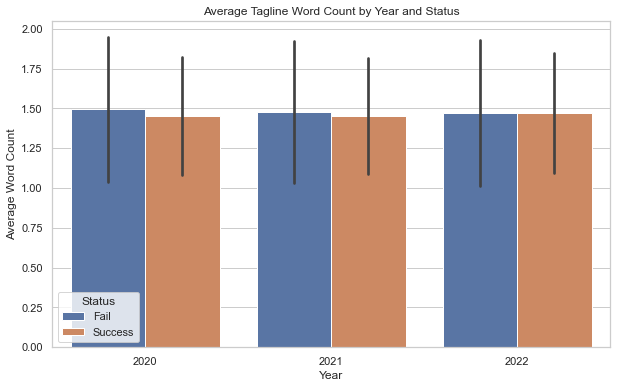

In [407]:
# Filter data for years 2020-2022
filtered_df = df[df['open_year'].between(2020, 2022)]

# Set up the Seaborn style
sns.set(style="whitegrid")

# Create an average bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_df, x='open_year', y='syl_per_word_title', hue='status', ci="sd")
plt.title('Average Tagline Word Count by Year and Status')
plt.xlabel('Year')
plt.ylabel('Average Word Count')
plt.legend(title='Status')
plt.show()